In [1]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
col = ['age', 'work_class', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
       'race',  'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_table(r'Data/adult.data',sep=',', names=col)

df

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
cat_column = df.dtypes[df.dtypes == 'O']
num_column = df.dtypes[df.dtypes != 'O']

In [4]:
for i in cat_column.index:
    print(f'**************{i.title()}**************')
    total = df[i].value_counts()
    percent = df[i].value_counts()/df.shape[0]
    df2 = pd.concat([total, percent], keys=['Total', 'Percent'], axis = 1)
    print(df2)
    print('\n')

**************Work_Class**************
                   Total   Percent
 Private           22696  0.697030
 Self-emp-not-inc   2541  0.078038
 Local-gov          2093  0.064279
 ?                  1836  0.056386
 State-gov          1298  0.039864
 Self-emp-inc       1116  0.034274
 Federal-gov         960  0.029483
 Without-pay          14  0.000430
 Never-worked          7  0.000215


**************Education**************
               Total   Percent
 HS-grad       10501  0.322502
 Some-college   7291  0.223918
 Bachelors      5355  0.164461
 Masters        1723  0.052916
 Assoc-voc      1382  0.042443
 11th           1175  0.036086
 Assoc-acdm     1067  0.032769
 10th            933  0.028654
 7th-8th         646  0.019840
 Prof-school     576  0.017690
 9th             514  0.015786
 12th            433  0.013298
 Doctorate       413  0.012684
 5th-6th         333  0.010227
 1st-4th         168  0.005160
 Preschool        51  0.001566


**************Marital_Status**************

In [5]:
df['work_class'].replace(to_replace=' ?', value='nan', inplace=True)
df['occupation'].replace(to_replace=' ?', value='nan', inplace=True)
df['native_country'].replace(to_replace=' ?', value='nan', inplace=True)

In [6]:
orginal_country = [' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico', ' South', ' Puerto-Rico', ' Honduras', 
                   ' England', ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia', 
                   ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic', ' El-Salvador', 
                   ' France', ' Guatemala', ' China', ' Japan', ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', 
                   ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', ' Hungary', 
                   ' Holand-Netherlands']

replace_country = ['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 
                   'Canada', 'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 
                   'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 
                   'Guatemala', 'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 
                   'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 
                   'Holand-Netherlands']

df['native_country'].replace(to_replace=orginal_country, value=replace_country, inplace=True)

In [7]:
original_occupation = [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty', ' Other-service', ' Sales', 
                       ' Craft-repair', ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',  
                       ' Protective-serv', ' Armed-Forces', ' Priv-house-serv']

replace_occupation = ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', 'Sales', 
                      'Craft-repair', 'Transport-moving', 'Farming-fishing', 'Machine-op-inspct', 'Tech-support',  
                      'Protective-serv', 'Armed-Forces', 'Priv-house-serv']

df['occupation'].replace(to_replace=original_occupation, value=replace_occupation, inplace=True)

In [8]:
original_workclass = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', 
                      ' Without-pay', ' Never-worked']

replace_workclass = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov', 'Self-emp-inc', 
                     'Without-pay', 'Never-worked']

df['work_class'].replace(to_replace=original_workclass, value=replace_workclass, inplace=True)

In [9]:
df['work_class'].replace(to_replace='nan', value=df['work_class'].mode()[0], inplace=True)
df['occupation'].replace(to_replace='nan', value=df['occupation'].mode()[0], inplace=True)
df['native_country'].replace(to_replace='nan', value=df['native_country'].mode()[0], inplace=True)

Text(0, 0.5, 'Frequency')

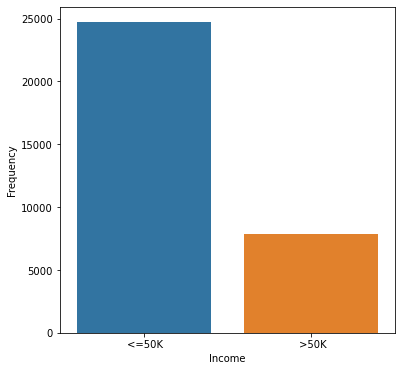

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='income', data=df)
plt.xlabel('Income', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

In [11]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [12]:
categorical = [feature for feature in df.columns if df[feature].dtype == 'O']
df[categorical].head()

,work_class,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [13]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical].head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [14]:
le = LabelEncoder()
for col in df[categorical]:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i]= df.apply(lambda i : le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [15]:
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [16]:
df.isnull().any()

age               False
work_class        False
final_weight      False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

<AxesSubplot:>

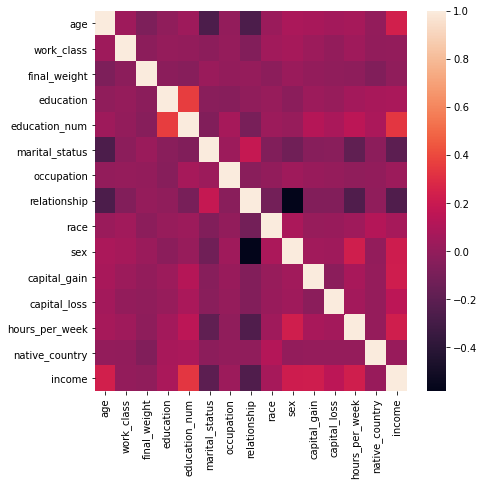

In [18]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

In [19]:
x = df.drop(['income'], axis=1)
y = df['income']

In [20]:
ETC = ExtraTreesClassifier()
ETC.fit(x, y)

ExtraTreesClassifier()

In [21]:
print(ETC.feature_importances_)

[0.15478811 0.04192025 0.16671494 0.03659103 0.08771518 0.06513422
 0.07383704 0.09891079 0.01464769 0.0284137  0.09212745 0.0283071
 0.09570141 0.01519109]


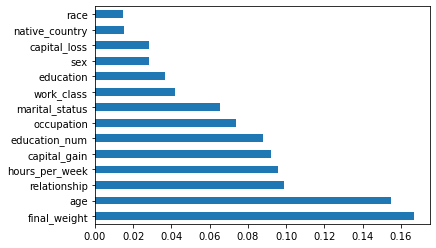

In [22]:
feat_importance=pd.Series(ETC.feature_importances_, index=x.columns)
feat_importance.nlargest(15).plot(kind='barh')
plt.show()

In [23]:
df.drop(['sex', 'native_country', 'capital_loss', 'race'], axis=1, inplace=True)

In [25]:
df.shape

(32561, 11)

In [26]:
X = df.drop(['income'], axis=1)
y = df['income']

In [39]:
X.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,capital_gain,hours_per_week
0,39,6,77516,9,13,4,0,1,2174,40
1,50,5,83311,9,13,2,3,0,0,13
2,38,3,215646,11,9,0,5,1,0,40
3,53,3,234721,1,7,2,5,0,0,40
4,28,3,338409,9,13,2,9,5,0,40


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
classifier=XGBClassifier(eval_metric='mlogloss')
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred=classifier.predict(X_test)
print(y_pred)
print('**'*20)
y_prob=classifier.predict_proba(X_test)
print(y_prob)

[0 0 1 ... 1 0 0]
****************************************
[[9.9356216e-01 6.4378404e-03]
 [6.6701722e-01 3.3298278e-01]
 [1.8370551e-01 8.1629449e-01]
 ...
 [2.2917986e-04 9.9977082e-01]
 [9.8838878e-01 1.1611216e-02]
 [9.9992293e-01 7.7070661e-05]]


In [35]:
print('ROC AUC Score : {}'.format(roc_auc_score(Y_test, y_prob[:,1])))
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

ROC AUC Score : 0.912497060104726
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.65      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

[[4592  350]
 [ 552 1019]]


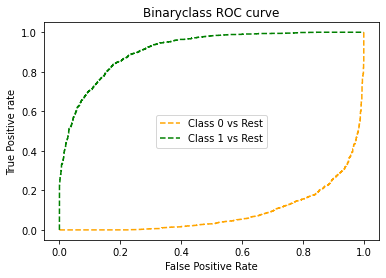

In [36]:
fpr = {}
tpr = {}
thresh ={}
n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, y_prob[:,1], pos_label=i)
    
# plotting ROC AUC Curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [37]:
result=classifier.predict(sc.transform([[40, 7000, 14, 2100, 0, 50, 3, 11, 0, 5]]))
if result==[0]:
      print('Person makes Below 50K/year')
else:
      print('Person makes Above 50K/year')

Person makes Below 50K/year


In [38]:
import pickle

file = 'Scaler_Census_Data.pkl'
pickle.dump(sc, open(file, 'wb'))

file2 = 'XGModel_Census_Data.pkl'
pickle.dump(classifier, open(file2, 'wb'))